# Лекция 4. Ранг матрицы, малоранговая аппроксимация, SVD. 

## На прошлой лекции

- Матричные нормы
- Унитарные матрицы
- Матрица Хаусхолдера
- Матрица Гивенса

## План на сегодня

- Ранг матрицы и его свойства
- Скелетное разложение
- Сингулярное разложение (SVD)
- Некоторые приложения сингулярного разложения

## Матрицы и линейные пространства

Матрица может быть рассмотрена как последовательность векторов, которые являются её столбцами:

$$
   A = [a_1, \ldots, a_m], 
$$

где $a_m \in \mathbb{C}^{n\times 1}$.  

Умножение матрицы на вектор эквивалентно вычислению линейной комбинации столбцов матрицы

$$
   y =  Ax \quad \Longleftrightarrow \quad y = a_1 x_1 + a_2 x_2 + \ldots +a_m x_m.
$$

## Линейная зависимость

**Определение.** Векторы $a_i$ называются **линейно зависимыми**, если существуют коэффициенты $x_i$ не равные нулю одновременно такие что

$$\sum_i a_i x_i = 0,$$

или в матричной форме

$$
   Ax = 0, \quad \Vert x \Vert \ne 0.
$$

В этом случае говорят, что у матрицы $A$ нетривиальное **ядро** (kernel или nullspace), которое обознаается $N(A)$ (или $\text{ker}(A)$).

Векторы, которые не являются линейно зависимыми называются **линейно независимыми**.

## Линейное пространство

**Линейное пространство** натянутое на векторы $\{a_1, \ldots, a_m\}$ определяется как множество всех возможных векторов вида

$$
   \mathcal{L}(a_1, \ldots, a_m) = \left\{y: y = \sum_{i=1}^m a_i x_i, \, \forall x_i, \, i=1,\dots, n \right\}, 
$$

В матричной форме линейное пространство – это множество всех $y$ таких что

$$y = A x.$$

Это множество также называется областью значений (range) или образом (image) матрицы и обозначается $\text{range}(A)$ (или $\text{im}(A)$) соответственно.

## Размерность линейного пространства

Размерность линейного пространства $\text{im}(A)$ обозначается как $\text{dim}\, \text{im} (A)$ и является минимальным числом векторов необходимых для представления каждого вектора из $\text{im} (A)$.

Размерность $\text{im}(A)$ напрямую связана с понятием **ранга матрицы**.


## Ранг матрицы 

**Определение.** Рангом матрицы $A$ называется максимальное число линейно независимых *столбцов* матрицы $A$.

Вы также можете использовать линейные комбинации *строк* для определения ранга, то есть формально существует два ранга: строчный и столбцовый.

**Теорема**  
Размерность пространства столбцов матрицы совпадает с размерностью пространства её строк.

[Доказательство](https://ocw.mit.edu/courses/mathematics/18-701-algebra-i-fall-2010/study-materials/MIT18_701F10_rrk_crk.pdf)

- В матричной форме этот факт может быть выражен следующим образом $\mathrm{dim}\ \mathrm{im} (A) = \mathrm{dim}\ \mathrm{im} (A^\top)$.

- Таким образом, ранг матрицы определяется однозначно!

## Матрица полного ранга


Матрица $A \in \mathbb{R}^{m \times n}$ называется матрицей полного ранга, если $\mathrm{rank}(A) = \min(m, n)$.

Пусть имеется линейное пространство, натянутое на $n$ векторов.
Пусть эти векторы сгенерированы из стандартного нормального распределения $\mathcal{N}(0, 1)$.

**Q**: Какова вероятность, что размерность этого подпространства $m < n$?

**A**: Случайная матрица является полноранговой с вероятностью 1. Краткое доказательство можно найти [тут](https://threesquirrelsdotblog.com/2019/08/10/a-few-probability-one-results/)

## Снижение размерности

- Многие данные в реальном мире лежат в пространстве высокой размерности. Например, изображения ($512\times 512$ пикселей), тексты, графы, etc.
- Однако, обрабатывать данные высокой размерности – сложная задача!

**Q**: Возможно ли уменьшить размерность данных, сохранив при этом важные отношения между объектами, например расстояние?

**[Лемма Johnson'a–Lindenstrauss'a](http://cseweb.ucsd.edu/~dasgupta/papers/jl.pdf)** 

Пусть $N\gg 1$. Дано $0 < \epsilon < 1$, $m$ точек из $\mathbb{R}^N$ и $n > \frac{8 \log m}{\epsilon^2}$ (мы хотим, чтобы $n\ll N$).

Тогда **существует** **линейное** отображение $f: \mathbb{R}^N \rightarrow \mathbb{R}^n$ такое что выполнено следующее неравенство:

$$(1 - \epsilon) \Vert u - v \Vert^2_2 \leq \Vert f(u) - f(v) \Vert^2_2 \leq (1 + \epsilon) \Vert u - v \Vert^2_2.$$


- Эта лемма утверждает, что существует линейное отображение из пространства большой размерности в пространство малой размерности такое что расстояния между точками в этих пространствах практически одинаковы.
- Утверждение не практичное из-за наличия зависимости от $\epsilon$.
- Эта лемма не даёт способа построения $f$, но гарантирует, что такое отображение существует.

## Скелетное разложение

Очень полезным для вычисления ранга матрицы является **скелетное разложение** матрицы.
Это разложение объясняет, почему и как матрицы малого ранга могут быть **сжаты**.

Графически скелетное разложение можно представить следующим образом:  

<img src="./skeleton.png" width='50%'>

или в матричной форме

$$
   A = C \widehat{A}^{-1} R,
$$

где $C$ образуют некоторые $r=\mathrm{rank}(A)$ столбцов матрицы $A$, $R$ образуют некоторые $r$ строк матрицы $A$ и  $\widehat{A}$ **невырожденная** подматрица, образованная пересечением строк и столбцов из $C$ и $R$.

### Замечание

Пока мы ещё не определили формально, что такое обратная матрица, поэтому кратко перечислим необходимые факты об обратных матрицах:

- Матрица, обратная к матрице $P$ – это такая матрица $Q = P^{-1}$ что $ P Q = QP = I$.  
- Если матрица квадратная и имеет полный ранг, то обратная матрица существует.

### Доказательство существования скелетного разложения

* Пусть $C\in \mathbb{C}^{n\times r}$ – $r$ столбцов взятых из невырожденной подматрицы $\widehat{A}$, поэтому они линейно независимы. 
* Возьмём произвольный столбец $a_i$ матрицы $A$. Тогда $a_i$ может быть представлен как линейная комбинация столбцов $C$, то есть $a_i = C x$.  

* $a_i = C x$ – это $n$ уравнений. Возьмём $r$ из них, которые соответствуют строкам матрицы $\widehat{A}$, и получим систему уравнений

$$\widehat{r} = \widehat{A} x \quad \Longrightarrow \quad x = \widehat{A}^{-1} \widehat r$$ 

Таким образом, $a_i = C\widehat{A}^{-1} \widehat r$ для каждого $i$ и 

$$A = [a_1,\dots, a_m] = C\widehat{A}^{-1} R.$$

### Подробнее про скелетное разложение 

Любая матрица ранга $r$ может быть записана в форме

$$A = C \widehat{A}^{-1} R,$$

где $C$ – матрица $n \times r$, $R$ – матрица $r \times m$ и $\widehat{A}$ размера $r \times r$, или 

$$
   A = U V,
$$
где $U$ и $V$ не единственны, например $U = C \widehat{A}^{-1}$, $V=R$.

Форма $A = U V$ является стандартной формой записи скелетного разложения.

Таким образом, каждая матрица ранга $r$ может быть записана как произведение "высокой" матрицы $U$ и "длинной" матрицы $V$.

В индексной форме его можно записать как 

$$
   a_{ij} = \sum_{\alpha=1}^r u_{i \alpha} v_{\alpha j}.
$$

Для ранга 1, получим

$$
   a_{ij} = u_i v_j,
$$

то есть наблюдаем разделение индексов, а матрица ранга $r$ – это сумма матриц ранга 1.

### Хранение и быстрое выполнение матрично-векторных операций

Отметим, что для матрицы ранга $r$

$$A = U V$$

можно хранить только $U$ и $V$, то есть всего лишь $(n+m) r$ элементов, что может быть использовано для сжатия. Мы также можем вычислить произведение матрицы $A$ ранга $r$ на вектор $x$ гораздо быстрее:

* Умножение $y = Vx$ стоит $\mathcal{O}(mr)$ операций.
* Умножение $z = Uy$ стоит $\mathcal{O}(nr)$ операций.

Это же применимо для сложения, поэлементного умножения и других операций.
Например, для сложения:

$$
    A_1 + A_2 = U_1 V_1 + U_2 V_2 = [U_1|U_2] [V_1^\top|V_2^\top]^\top
$$

**Упражнение**. Как аналогичные преобразования сделать для операции поэлементного умножения? То есть $C = A * B$ или $c_{ij} = a_{ij} * b_{ij}$ и матрицы $A, B$ представлены в малоранговом формате.

In [1]:
# A fast matrix-by-vector product demo
import numpy as np
n = 10000
r = 10
u = np.random.randn(n, r)
v = np.random.randn(n, r)
a = u.dot(v.T)
x = np.random.randn(n)
%timeit a@x
%timeit u@(v.T@x)

10 ms ± 988 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
288 µs ± 72.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Вычисление ранга матрицы
Мы также можем попробовать вычислить ранг матрицы с помощью функции из NumPy: ```np.linalg.matrix_rank```

In [7]:
# Computing matrix rank
import numpy as np
n = 50 
a = np.ones((n, n))
print('Rank of the matrix:', np.linalg.matrix_rank(a))
b = a + 1e-5 * np.random.randn(n, n)
print('Rank of the matrix:', np.linalg.matrix_rank(b, tol=1e-7))

Rank of the matrix: 1
Rank of the matrix: 50


### <font color='red'> Итак, малое возмущение матрицы может очень сильно повлиять на ранг! </font>

### Неустойчивость вычисления ранга матрицы

Для любой матрицы $A$ ранга $r < \min(m, n)$ существует матрица $B$ такая что её ранг равен $\min(m, n)$ и

$$
 \Vert A - B \Vert = \epsilon.
$$

**Q**: Значит ли это, что численный ранг матрицы не имеет никакого смысла? (Малое возмущение приводит к полному рангу!)

**A**: Нет. Нам нужно найти матрицу $B$ такую что $\|A-B\| = \epsilon$ и ранг $B$ минимален. Таким образом, мы можем вычислить ранг матрицы только с заданной точностью $\epsilon$.
Один из подходов к вычислению ранга матрицы – это сингулярное разложение матрицы (SVD).

## Малоранговая аппроксимация

Важная задача во многих прилоджениях – это найти малоранговое приближение для данной матрицы с точностью $\epsilon$ или рангом $r$. <br>

Примеры:
* метод главных компонент (PCA)
* линейная задача наименьших квадратов
* латентный семантический анализ

Эти задачи могут быть решены с помощью SVD.

## Сингулярное разложение

Для вычисления малорангового приближения нам нужно уметь вычислять **сингулярное разложение** (SVD).

**Теорема** Любая матрица $A\in \mathbb{C}^{n\times m}$ может быть представлена в виде произведения трёх матриц:  

$$
   A = U \Sigma V^*,
$$

где $U$ – унитарная матрица $n \times K$, $V$ – унитарная матрица $m \times K$, $K = \min(m, n)$, <br> $\Sigma$ – диагональная матрица с неотрицательными элементами на диагонали $\sigma_1 \geq  \ldots, \geq \sigma_K$. <br>
Более того, если $\text{rank}(A) = r$, тогда $\sigma_{r+1} = \dots = \sigma_K = 0$.

### Доказательство
* Матрица $A^*A$ эрмитова, поэтому диагонализуема в унитарном базисе (подробнее будет рассказано на следующих лекциях).
* $A^*A\succeq 0$ (неотрицательно определена), поэтому собственные значения неотрицательны.
Поэтому существует унитарная матрица $V = [v_1, \dots, v_n]$ такая что

$$
    V^* A^* A V = \text{diag}(\sigma_1^2,\dots, \sigma_n^2), \quad \sigma_1\geq \sigma_2\geq \dots \geq \sigma_n \geq 0.
$$

Пусть $\sigma_i = 0$ для $i>r$, где $r$ некоторое целое число. <br>
Пусть $V_r= [v_1, \dots, v_r]$, $\Sigma_r = \text{diag}(\sigma_1, \dots,\sigma_r)$. Таким образом,

$$
    V^*_r A^* A V_r = \Sigma_r^2 \quad \Longrightarrow \quad (\Sigma_r^{-1} V_r^* A^*) (A V_r\Sigma_r^{-1} ) = I.
$$

В результате для матрицы $U_r = A V_r\Sigma_r^{-1}$ выполнено $U_r^* U_r = I$ и следовательно её столбцы ортогональны. <br>
Присоединим к матрице $U_r$ произвольные ортогональные столбцы, которые также ортогональны столбцам $U_r$ и обозначим такую матрицу $U$.
Тогда

$$
    AV = U \begin{bmatrix} \Sigma_r & 0 \\ 0 & 0 \end{bmatrix}\quad \Longrightarrow \quad U^* A V = \begin{bmatrix}\Sigma_r & 0 \\ 0 & 0 \end{bmatrix}.
$$

Поскольку умножение на невырожденную матрицу не меняет ранга $A$, получим $r = \text{rank}(A)$.

**Следствие 1**: $A = \displaystyle{\sum_{\alpha=1}^r} \sigma_\alpha u_\alpha v_\alpha^*$ или поэлементно $a_{ij} = \displaystyle{\sum_{\alpha=1}^r} \sigma_\alpha u_{i\alpha} \overline{v}_{j\alpha}$

**Следствие 2**: $$\text{ker}(A) = \mathcal{L}\{v_{r+1},\dots,v_n\}$$
$$\text{im}(A) = \mathcal{L}\{u_{1},\dots,u_r\}$$
$$\text{ker}(A^*) = \mathcal{L}\{u_{r+1},\dots,u_n\}$$
$$\text{im}(A^*) = \mathcal{L}\{v_{1},\dots,v_r\}$$

# Теорема Eckart'a-Young'a

Наилучшая малоранговая аппроксимация может быть вычислена с помощью SVD.

**Теорема:** Пусть $r < \text{rank}(A)$, $A_r = U_r \Sigma_r V_r^*$. Тогда

$$
    \min_{\text{rank}(B)=r} \|A - B\|_2 = \|A - A_r\|_2 = \sigma_{r+1}.
$$

Похожий результат справедлив и для $\|\cdot\|_F$, но $\|A - A_r\|_F = \sqrt{\sigma_{r+1}^2 + \dots + \sigma_{\min (n,m)}^2}$.

## Доказательство  

- Поскольку $\text{rank} (B) = r$, то справедливо равенство $\text{dim}~\text{ker}~B = n-r$. 
- Тогда существует $z\not=0$ такой что $z\in \text{ker}(B) \cap \mathcal{L}(v_1,\dots,v_{r+1})$ (так как $\text{dim}\{v_1,\dots,v_{r+1}\} = r+1$).
- Зафиксируем $\|z\|_2 = 1$. Тогда,

$$
    \|A-B\|_2^2 \geq \|(A-B)z\|_2^2 = \|Az\|_2^2 = \| U\Sigma V^* z\|^2_2= \|\Sigma V^* z\|^2_2 = \sum_{i=1}^{n} \sigma_i^2 (v_i^*z)^2 =\sum_{i=1}^{r+1} \sigma_i^2 (v_i^*z)^2 \geq \sigma_{r+1}^2\sum_{i=1}^{r+1} (v_i^*z)^2 = \sigma_{r+1}^2
$$

так как $\sigma_1\geq \dots \geq \sigma_{r+1}$ и $$\sum_{i=1}^{r+1} (v_i^*z)^2 = \|Vz\|_2^2 = \|z\|_2^2 = 1.$$

- Мы показали оценку снизу на норму разности матрицы $A$ и произвольной матрицы $B$ ранга $r$. Осталось показать, что эта оценка достигается для $B = A_r$.

## Основной результат о малоранговой аппроксимации

**Следствие:** вычисление наилучшей аппроксимации ранга $r$ эквивалентно использованию SVD с $\sigma_{r+1}= 0, \ldots, \sigma_K = 0$. Тогда ошибка аппроксимации равна 

$$
   \min_{A_r} \Vert A - A_r \Vert_2 = \sigma_{r+1}, \quad \min_{A_r} \Vert A - A_r \Vert_F = \sqrt{\sigma_{r+1}^2 + \dots + \sigma_{K}^2}
$$

поэтому так важно смотреть на степень убывания сингулярных чисел матрицы.

## Вычисление SVD

Алгоритмы для вычисления SVD довольно нетривиальны и будут рассмотрены на следующих лекциях.

Но для вычислений мы уже можем использовать NumPy!

In [8]:
#Computing matrix rank
import numpy as np
n = 50 
a = np.ones((n, n))
print('Rank of the matrix:', np.linalg.matrix_rank(a))
b = a + 1e-10 * np.random.randn(n, n)
print('Rank of the matrix:', np.linalg.matrix_rank(b))

Rank of the matrix: 1
Rank of the matrix: 50


In [11]:
u, s, v = np.linalg.svd(a, full_matrices=False)
print(u.shape, s.shape, v.shape)
print(s[1])
r = 1
u1 = u[:, :r]
s1 = s[:r]
v1 = v[:r, :]
a1 = u1.dot(np.diag(s1).dot(v1))
print(np.linalg.norm(b - a1, 2))
# print(s)
# print(np.linalg.matrix_rank(b, 1e-4))



(50, 50) (50,) (50, 50)
4.945791244853892e-15
1.3069568260679545e-09


In [35]:
m = 1000
k = 5
n = 10
u = np.random.randn(m, k)
v = np.random.randn(k, n)
A = u @ v
u, s, v = np.linalg.svd(A, full_matrices=False, compute_uv=True)
s = np.linalg.svd(A, compute_uv=False)
print(u.shape, s.shape, v.shape)
print(np.linalg.norm(u.T @ u - np.eye(n)))
# Check broadcasting here!
print(np.linalg.norm(A - u @ (s[:, None] * v)))

(1000, 10) (10,) (10, 10)
6.637761209898585e-15
3.6270854005461095e-13


## Разделение переменных для двумерной функции

Мы можем использовать SVD для вычисления аппроксимации матриц, полученных из вычисления некоторой функции в точках сетки

$$a_{ij} = f(x_i, y_j),$$

где $f$ заданная функция, а $x_i, \; i = 1, \ldots, n$ и $y_j, \; j = 1, \ldots, m$ некоторые одномерные сетки.

Text(0.5, 0, 'Singular value index, $i$')

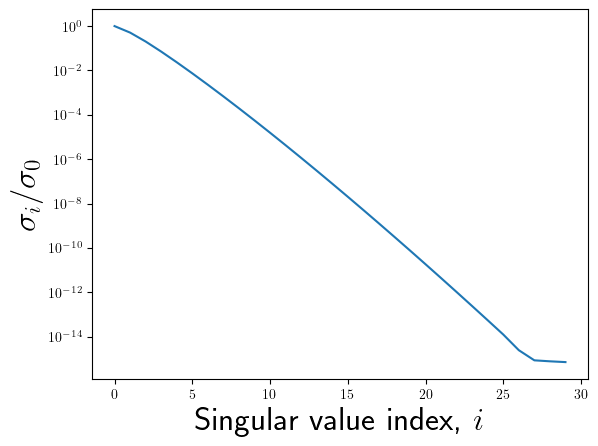

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
# plt.xkcd()
n = 1000
a = [[1.0/(i+j+1) for i in range(n)] for j in range(n)] #Hilbert matrix 
a = np.array(a)
u, s, v = np.linalg.svd(a)
plt.semilogy(s[:30]/s[0])
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=24)
plt.xlabel(r"Singular value index, $i$", fontsize=24)

Теперь попробуем аппроксимировать заданную функцию

Approximation error = 3.613060362582972e-10


Text(0.5, 0, 'Singular value index, $i$')

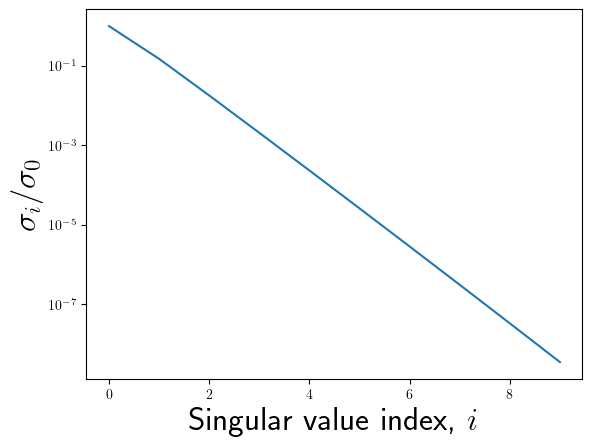

In [31]:
import numpy as np
n = 128
t = np.linspace(0, 5, n)
x, y = np.meshgrid(t, t)
f = 1.0 / (x + y + 0.5) # test your own function. Check 1.0 / (x - y + 0.5)
u, s, v = np.linalg.svd(f, full_matrices=False)
r = 10
u = u[:, :r]
s = s[:r]
v = v[:r, :] # Mind the transpose here!
fappr = u.dot(np.diag(s).dot(v))
er = np.linalg.norm(fappr - f, 'fro') / np.linalg.norm(f, 'fro')
print("Approximation error =", er)
plt.semilogy(s/s[0])
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=24)
plt.xlabel(r"Singular value index, $i$", fontsize=24)

И несколько 3D графиков

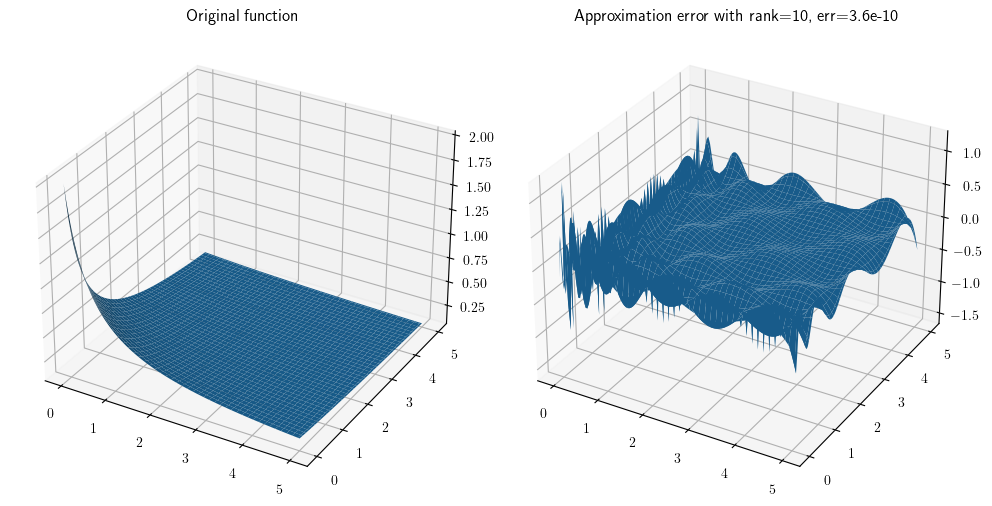

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# plt.xkcd()
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, f)
ax.set_title('Original function')
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x, y, fappr - f)
ax.set_title('Approximation error with rank=%d, err=%3.1e' % (r, er))
fig.subplots_adjust()
fig.tight_layout()

## Сингулярные числа случайной гауссовой матрицы 

**Q**: Как будут убывать сингулярные числа случайной матрицы?

Text(0.5, 0, 'Singular value index, $i$')

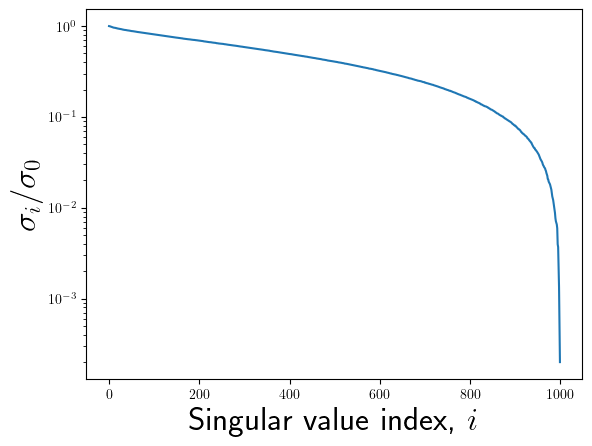

In [33]:
import numpy as np
import matplotlib.pyplot as plt
n = 1000
a = np.random.randn(n, n)
u, s, v = np.linalg.svd(a)
plt.semilogy(s/s[0])
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=24)
plt.xlabel(r"Singular value index, $i$", fontsize=24)

## Приложения SVD

SVD имеет много разных названий, например метод главных компонент (PCA), Proper Orthogonal Decomposition, Empirical Orthogonal Functions, etc

Рассмотрим следующие прикладные задачи:

1. Латентный семантический анализ
2. Коллаборативная фильтрация
3. Сжатие данных

## Сжатие плотных матриц

Для хранения плотных матриц размера $N \times N$ обычно необходимо $N^2$ памяти. Аппроксимация ранга $r$ позволяет сократить требуемую память до $\mathcal{O}(Nr)$

Text(0.5, 0, 'Singular value index, $i$')

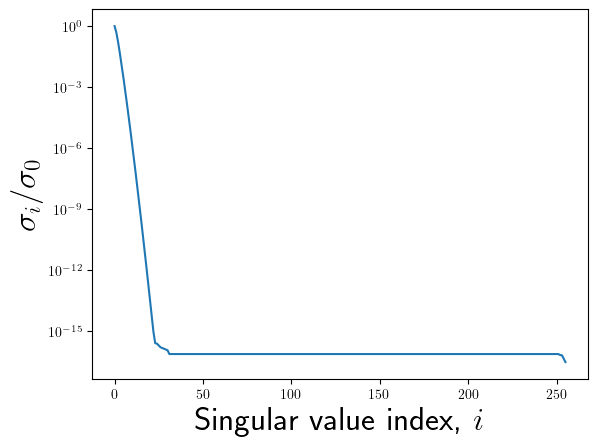

In [34]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# plt.xkcd()
n = 256
a = [[1.0/(i + j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)
u, s, v = np.linalg.svd(a)
plt.semilogy(s/s[0])
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=24)
plt.xlabel(r"Singular value index, $i$", fontsize=24)

## Главное в этой лекции

- Ранг матрицы
- Скелетное разложение и представление матрицы ранга $r$
- SVD и теорема Eckart'a-Young'a
- Приложения SVD